In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [104]:
import yfinance as yf

In [105]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 50000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"

In [106]:
stock_data = {}

for stock in stocks:
  ticker=yf.Ticker(stock)
  stock_data[stock]=ticker.history(start=start_date, end=end_date)['Close']

stock_prices=pd.DataFrame(stock_data)
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1197.153320,2024.673828,1513.858887,982.032715,246.232254,1140.845947,645.737122
2018-10-03 00:00:00+05:30,1171.299316,1941.462646,1492.242554,979.958069,244.657578,1138.423706,630.040161
2018-10-04 00:00:00+05:30,1090.773071,1853.448975,1450.854126,944.545044,237.944412,1149.803955,611.618896
2018-10-05 00:00:00+05:30,1019.431946,1887.424316,1436.658691,948.187866,229.159271,1121.924927,626.667358
2018-10-08 00:00:00+05:30,1078.283569,1864.894287,1437.395874,938.393738,226.424286,1110.910400,617.889160
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3577.149902,2475.850098,1531.000000,442.600006,2902.500000,1474.150024
2023-09-26 00:00:00+05:30,2342.500000,3585.699951,2478.949951,1537.650024,442.450012,2912.550049,1460.650024
2023-09-27 00:00:00+05:30,2368.899902,3589.300049,2501.750000,1526.849976,449.149994,2965.050049,1467.000000


In [107]:
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns.dropna()

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002125,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046393,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024546,0.024307
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
2018-10-09 00:00:00+05:30,-0.017596,0.006835,-0.030538,-0.002265,-0.017353,0.004679,0.004608
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [108]:
print(log_returns.mean()*NUM_TRADING_DAYS)

RELIANCE.NS      0.137190
TCS.NS           0.113347
HINDUNILVR.NS    0.099529
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.163002
dtype: float64


In [109]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.313954
TCS.NS           0.253070
HINDUNILVR.NS    0.238602
HDFCBANK.NS      0.270058
ITC.NS           0.265032
LT.NS            0.283981
INFY.NS          0.292504
dtype: float64


In [110]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

In [111]:
for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk =np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)


In [112]:
portfolio_weights=np.array(portfolio_weights)
portfolio_returns=np.array(portfolio_returns)
portfolio_risks=np.array(portfolio_risks)

In [113]:
portfolios = pd.DataFrame({"Return" : portfolio_returns, "Risk" : portfolio_risks, "Sharpe Ratio" : portfolio_returns/portfolio_risks})

In [114]:
portfolios

,Return,Risk,Sharpe Ratio
0,0.129836,0.182360,0.711974
1,0.131909,0.197886,0.666591
2,0.135680,0.194149,0.698843
3,0.135579,0.179879,0.753721
4,0.132514,0.185403,0.714737
...,...,...,...
49995,0.136513,0.179633,0.759956
49996,0.129796,0.183975,0.705510
49997,0.125992,0.193277,0.651870
49998,0.132739,0.181885,0.729797


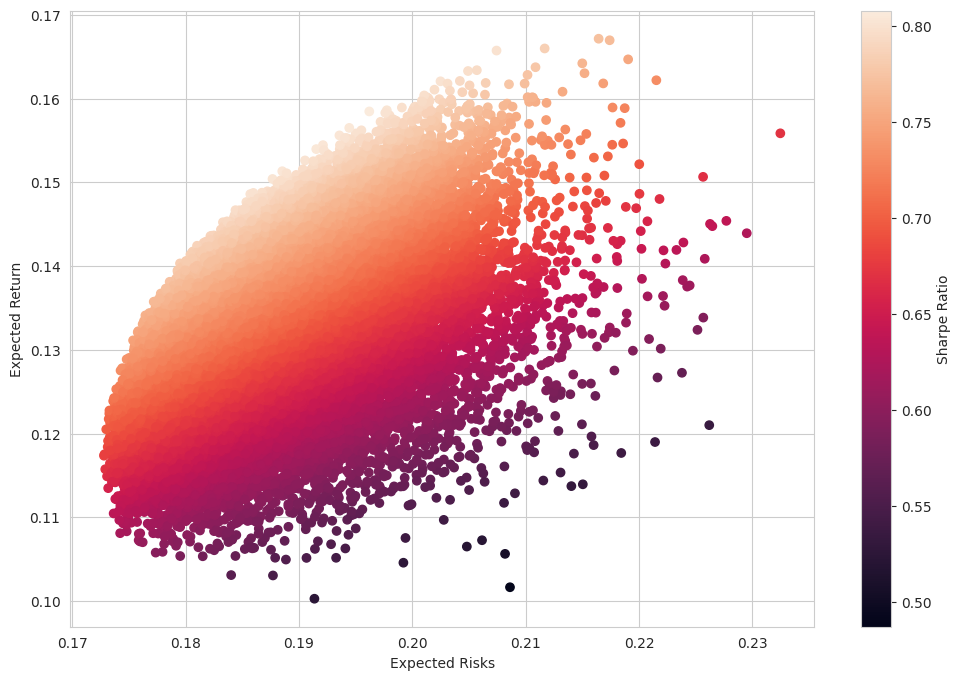

In [115]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_returns/portfolio_risks, marker='o')
plt.grid(True)
plt.xlabel("Expected Risks")
plt.ylabel("Expected Return")
plt.colorbar(label="Sharpe Ratio")
plt.show()

In [116]:
sharpe_ratios = portfolio_returns/portfolio_risks

ind=0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [117]:
sharpe_ratios[ind]

0.8077439760712384

In [118]:
portfolio_returns[ind]

0.15847960643219328

In [119]:
portfolio_risks[ind]

0.19620029505266937

In [120]:
for i in range(len(stocks)):
  print(stocks[i], ':' , portfolio_weights[ind][i])

RELIANCE.NS : 0.021764759866277503
TCS.NS : 0.03609233832049598
HINDUNILVR.NS : 0.09835493412834317
HDFCBANK.NS : 0.010432940591737494
ITC.NS : 0.2109681189343479
LT.NS : 0.38484467565049413
INFY.NS : 0.2375422325083039


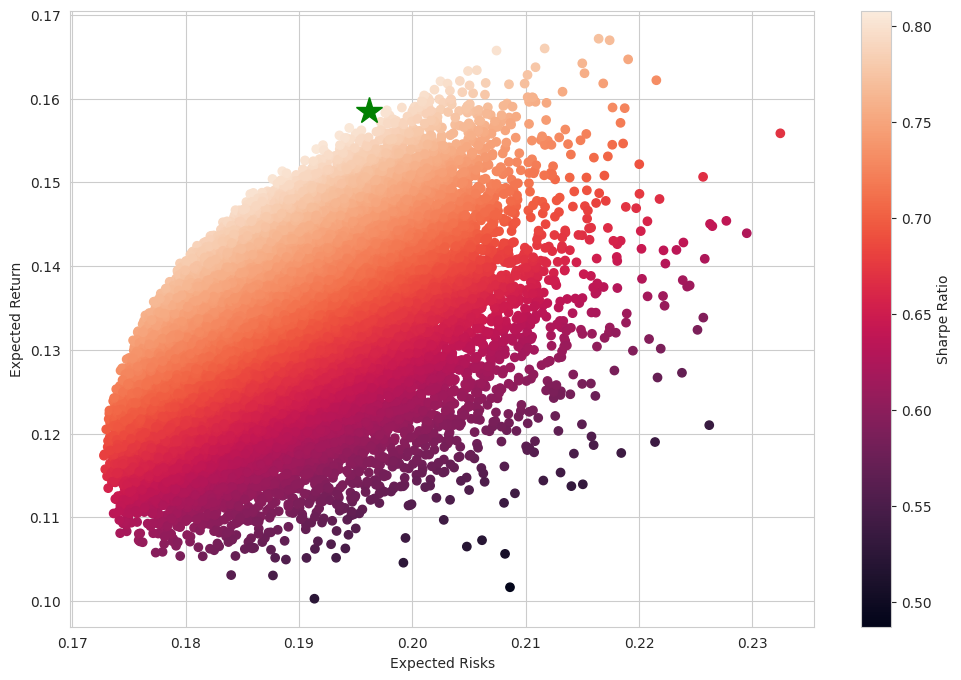

In [121]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_returns/portfolio_risks, marker='o')
plt.grid(True)
plt.xlabel("Expected Risks")
plt.ylabel("Expected Return")
plt.colorbar(label="Sharpe Ratio")
plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize=20.0)

In [122]:
ind=0

for i in range(len(portfolio_risks)):
  if portfolio_risks[i] == np.amin(portfolio_risks):
    ind = i

In [123]:
portfolio_returns[ind]

0.11736525760874908

In [124]:
portfolio_risks[ind]

0.17278629478063245

In [125]:
for i in range(len(stocks)):
  print(stocks[i], ':' , portfolio_weights[ind][i])

RELIANCE.NS : 0.02744751916962136
TCS.NS : 0.2466461327196458
HINDUNILVR.NS : 0.2767525988466553
HDFCBANK.NS : 0.11513263696465192
ITC.NS : 0.21953905009743535
LT.NS : 0.07323154988603724
INFY.NS : 0.04125051231595295


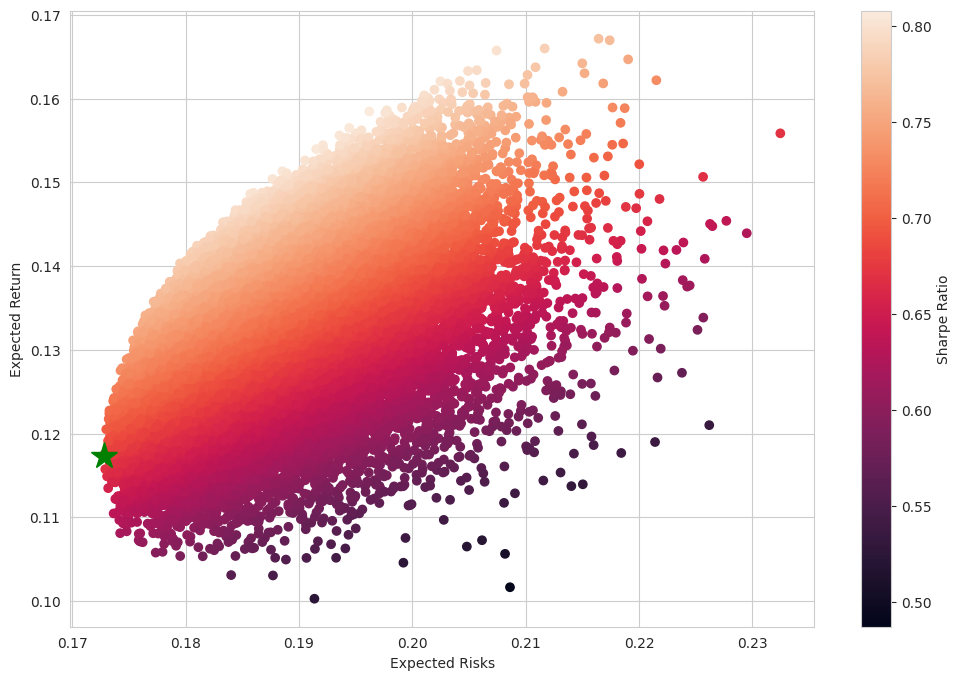

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_returns/portfolio_risks, marker='o')
plt.grid(True)
plt.xlabel("Expected Risks")
plt.ylabel("Expected Return")
plt.colorbar(label="Sharpe Ratio")
plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize=20.0)